In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fake_news_sample.csv to fake_news_sample (4).csv


Dataset Loaded Successfully ✅
                                                text label
0  The government has approved the new health pol...  REAL
1  Scientists discover a new planet in the solar ...  REAL
2               Click here to win a free iPhone now!  FAKE
3  Breaking news: celebrity endorses miracle weig...  FAKE
4               The president met with the UN today.  REAL
✅ Accuracy: 50.0%


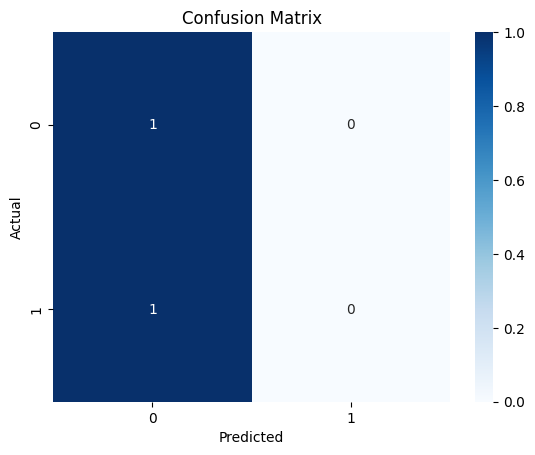

Prediction for sample news: REAL


In [9]:
import pandas as pd

df = pd.read_csv("fake_news_sample.csv")  # filename must match uploaded file
df.head()

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("fake_news_sample.csv")
print("Dataset Loaded Successfully ✅")
print(df.head())
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['text'] = df['text'].apply(clean_text)

x = df['text']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

model = PassiveAggressiveClassifier(max_iter=50)
model.fit(x_train_vec, y_train)

y_pred = model.predict(x_test_vec)
score = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {round(score * 100, 2)}%")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

sample_news = ["The Prime Minister announces new education policy."]
clean_sample = [clean_text(sample_news[0])]
vec_sample = vectorizer.transform(clean_sample)

prediction = model.predict(vec_sample)
print("Prediction for sample news:", prediction[0])